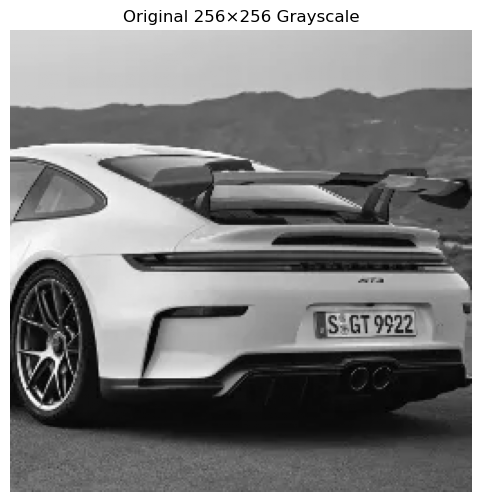

In [1]:
# %%
# Q9 — DFT filtering with padding and without padding
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load grayscale sample image of size 256x256 (or it will be resized) ---
img_path = "../256x256.jpg"   # replace with your image path
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError(img_path)

img_gray = cv2.resize(img_gray, (256, 256))  # ensure 256x256
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap="gray")
plt.title("Original 256×256 Grayscale")
plt.axis("off")
plt.show()


In [2]:
# %%
def fft_image(img):
    """Compute centered 2D FFT and return (complex spectrum, magnitude)"""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = np.log(1 + np.abs(fshift))
    return fshift, mag

def ifft_image(fshift):
    """Inverse centered 2D FFT"""
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

def ideal_lowpass(shape, cutoff):
    """Ideal low-pass filter mask"""
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            if np.sqrt((u-crow)**2 + (v-ccol)**2) <= cutoff:
                mask[u,v] = 1
    return mask


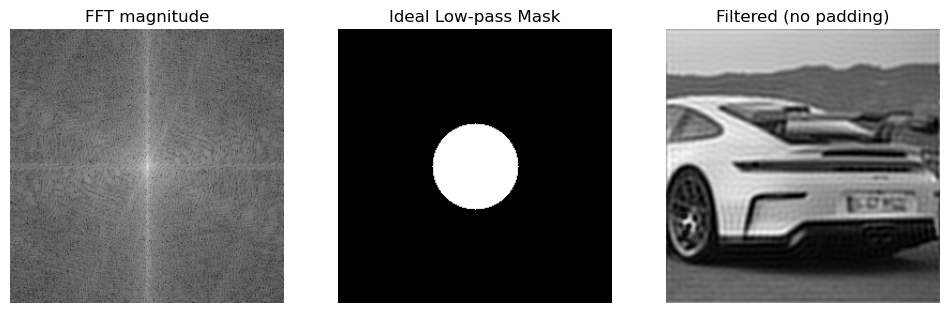

In [3]:
# %%
# Ideal low-pass filter with cutoff frequency 40
cutoff = 40
fshift, mag = fft_image(img_gray)
mask = ideal_lowpass(img_gray.shape, cutoff)

filtered_shift = fshift * mask
img_filtered = ifft_image(filtered_shift)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(mag, cmap="gray"); plt.title("FFT magnitude")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(mask*255, cmap="gray"); plt.title("Ideal Low-pass Mask")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.uint8(np.clip(img_filtered,0,255)), cmap="gray"); plt.title("Filtered (no padding)")
plt.axis("off")
plt.show()


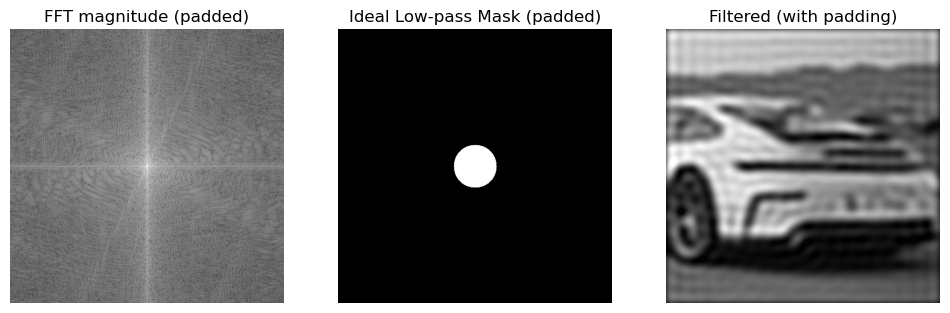

In [4]:
# %%
# Pad image to 512x512 with zeros
rows, cols = img_gray.shape
padded = np.zeros((rows*2, cols*2), np.float32)
padded[:rows, :cols] = img_gray

# FFT of padded image
fshift_p, mag_p = fft_image(padded)

# Create filter mask of padded size (cutoff scaled)
mask_p = ideal_lowpass(padded.shape, cutoff)

# Apply filter
filtered_shift_p = fshift_p * mask_p
img_filtered_p = ifft_image(filtered_shift_p)

# Crop back to 256x256
img_filtered_p_cropped = img_filtered_p[:rows, :cols]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(mag_p, cmap="gray"); plt.title("FFT magnitude (padded)")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(mask_p*255, cmap="gray"); plt.title("Ideal Low-pass Mask (padded)")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.uint8(np.clip(img_filtered_p_cropped,0,255)), cmap="gray"); plt.title("Filtered (with padding)")
plt.axis("off")
plt.show()


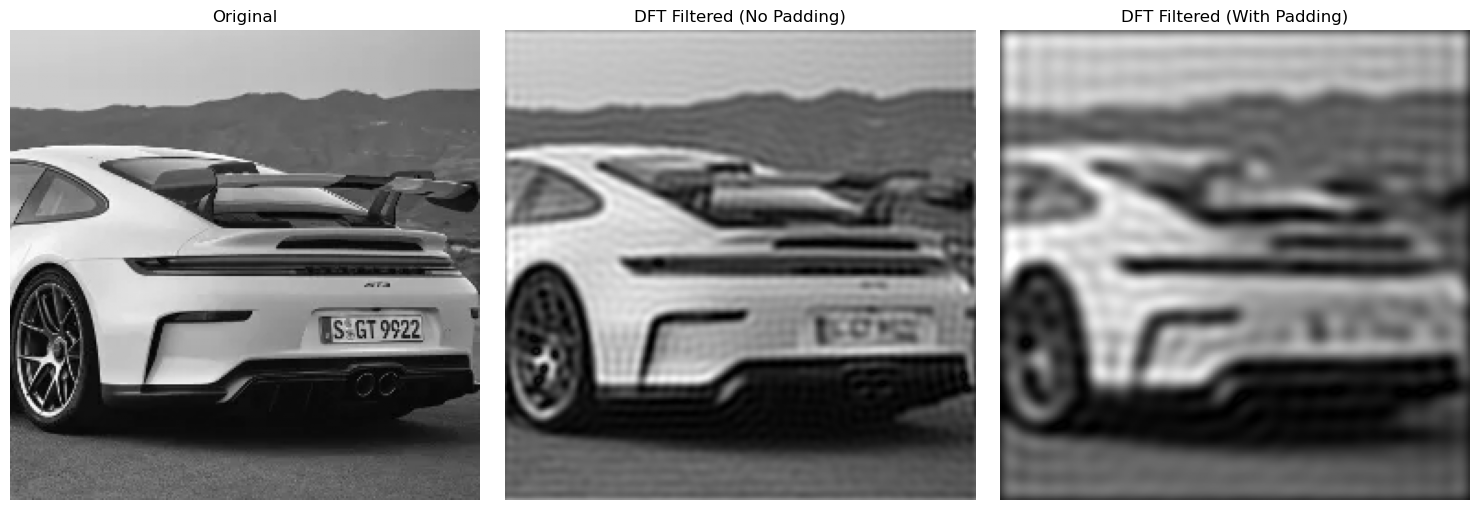

In [5]:
# %%
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img_gray, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(np.uint8(np.clip(img_filtered,0,255)), cmap="gray")
ax[1].set_title("DFT Filtered (No Padding)")
ax[1].axis("off")

ax[2].imshow(np.uint8(np.clip(img_filtered_p_cropped,0,255)), cmap="gray")
ax[2].set_title("DFT Filtered (With Padding)")
ax[2].axis("off")

plt.tight_layout()
plt.show()
